In [1]:
import numpy as np
import os

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import pickle

In [2]:
# Path to recorded dataset

datasets_dir = "./Data/RecordedData/"

# Combine FT sensor data from ILoSA 

/tmp/ipykernel_685372/3989766937.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_left_ilosa = np.array(np.load(data_file_left_ilosa, allow_pickle=True,))
/tmp/ipykernel_685372/3989766937.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_right_ilosa = np.array(np.load(data_file_right_ilosa, allow_pickle=True,))
/tmp/ipykernel_685372/3989766937.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you

Length of left dataset: 10, and 30
Length of right dataset: 10, and 29
Combined length of left dataset: 40
Combined length of right dataset: 39
Training dataset: (63, 63)
Testing dataset: (16, 16)
920


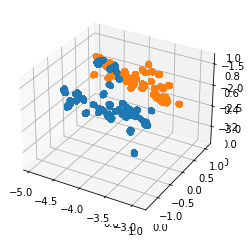

In [8]:
# Load dataset

# left
data_file_left_ilosa = os.path.join(datasets_dir, 'record_wrench_data_left.pickle')
data_file_right_ilosa = os.path.join(datasets_dir, 'record_wrench_data_right.pickle')
data_left_ilosa = np.array(np.load(data_file_left_ilosa, allow_pickle=True,))
data_right_ilosa = np.array(np.load(data_file_right_ilosa, allow_pickle=True,))

# right
data_file_left_ilosa_1 = os.path.join(datasets_dir, 'record_wrench_data_left_1.pickle')
data_file_right_ilosa_1 = os.path.join(datasets_dir, 'record_wrench_data_right_1.pickle')
data_left_ilosa_1 = np.array(np.load(data_file_left_ilosa_1, allow_pickle=True,))
data_right_ilosa_1 = np.array(np.load(data_file_right_ilosa_1, allow_pickle=True,))

print(f"Length of left dataset: {len(data_left_ilosa)}, and {len(data_left_ilosa_1)}")
print(f"Length of right dataset: {len(data_right_ilosa)}, and {len(data_right_ilosa_1)}")

# combine dataset
combined_left_ilosa = np.concatenate((data_left_ilosa, data_left_ilosa_1), axis=0)
combined_right_ilosa = np.concatenate((data_right_ilosa, data_right_ilosa_1), axis=0)

print(f"Combined length of left dataset: {len(combined_left_ilosa)}")
print(f"Combined length of right dataset: {len(combined_right_ilosa)}")

# get wrench 
wrench_left = np.array([combined_left_ilosa[i][1] for i in range(len(combined_left_ilosa))], dtype=object)
wrench_right = np.array([combined_right_ilosa[i][1] for i in range(len(combined_right_ilosa))], dtype=object)

# get labels
labels_left = np.array([combined_left_ilosa[i][0] for i in range(len(combined_left_ilosa))], dtype=object)
labels_right = np.array([combined_right_ilosa[i][0] for i in range(len(combined_right_ilosa))], dtype=object)

# plot
fig = plt.figure()
ax = plt.axes(projection='3d')

force_left = [wrench_left[i][j][:3] for i in range(len(wrench_left)) for j in range(len(wrench_left[i]))]
force_right = [wrench_right[i][j][:3] for i in range(len(wrench_right)) for j in range(len(wrench_right[i]))]

force_x_left = [force_left[i][0] for i in range(len(force_left))]
force_y_left = [force_left[i][1] for i in range(len(force_left))]
force_z_left = [force_left[i][2] for i in range(len(force_left))]

force_x_right = [force_right[i][0] for i in range(len(force_right))]
force_y_right = [force_right[i][1] for i in range(len(force_right))]
force_z_right = [force_right[i][2] for i in range(len(force_right))]
force_x_left

ax = plt.axes(projection='3d')
ax.scatter3D(force_x_left, force_y_left, force_z_left, cmap='Greens');
ax.scatter3D(force_x_right, force_y_right, force_z_right, cmap='red');


combined_data_ilosa = np.concatenate((combined_left_ilosa, combined_right_ilosa), axis=0)


X = np.array([combined_data_ilosa[i][1] for i in range(len(combined_data_ilosa))])
y = np.array([combined_data_ilosa[i][0] for i in range(len(combined_data_ilosa))])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f"Training dataset: {X_train.shape[0], y_train.shape[0]}")
print(f"Testing dataset: {X_test.shape[0], y_test.shape[0]}")

combined_data_training_ilosa = [(y_train[i], X_train[i]) for i in range(len(X_train))]

with open('./Data/CombinedData/combined_data_training_ilosa.pickle', 'wb') as handle:
    pickle.dump(combined_data_training_ilosa, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
combined_data_testing_ilosa = [(y_test[i] ,X_test[i]) for i in range(len(X_test))]

with open('./Data/CombinedData/combined_data_testing_ilosa.pickle', 'wb') as handle:
    pickle.dump(combined_data_testing_ilosa, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Combine FT sensor data from panda

/tmp/ipykernel_685372/1760960297.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_left_panda = np.array(np.load(data_file_left_panda, allow_pickle=True,))
/tmp/ipykernel_685372/1760960297.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_right_panda = np.array(np.load(data_file_right_panda, allow_pickle=True,))
/tmp/ipykernel_685372/1760960297.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you

Length of left dataset: 10, and 30
Length of right dataset: 10, and 29
Combined length of left dataset: 40
Combined length of right dataset: 39
Training dataset: (63, 63)
Testing dataset: (16, 16)


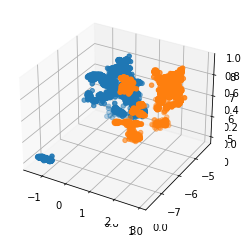

In [9]:
# Load dataset

# left
data_file_left_panda = os.path.join(datasets_dir, 'record_wrench_data1_left.pickle')
data_file_right_panda = os.path.join(datasets_dir, 'record_wrench_data1_right.pickle')
data_left_panda = np.array(np.load(data_file_left_panda, allow_pickle=True,))
data_right_panda = np.array(np.load(data_file_right_panda, allow_pickle=True,))

# right
data_file_left_panda_1 = os.path.join(datasets_dir, 'record_wrench_data1_left_1.pickle')
data_file_right_panda_1 = os.path.join(datasets_dir, 'record_wrench_data1_right_1.pickle')
data_left_panda_1 = np.array(np.load(data_file_left_panda_1, allow_pickle=True,))
data_right_panda_1 = np.array(np.load(data_file_right_panda_1, allow_pickle=True,))

print(f"Length of left dataset: {len(data_left_panda)}, and {len(data_left_panda_1)}")
print(f"Length of right dataset: {len(data_right_panda)}, and {len(data_right_panda_1)}")

# combine_dataset
combined_left_panda = np.concatenate((data_left_panda, data_left_panda_1), axis=0)
combined_right_panda = np.concatenate((data_right_panda, data_right_panda_1), axis=0)

print(f"Combined length of left dataset: {len(combined_left_panda)}")
print(f"Combined length of right dataset: {len(combined_right_panda)}")

# get wrench
wrench_left = np.array([combined_left_panda[i][1] for i in range(len(combined_left_panda))], dtype=object)
wrench_right = np.array([combined_right_panda[i][1] for i in range(len(combined_right_panda))], dtype=object)

# get labels
labels_left = np.array([combined_left_panda[i][0] for i in range(len(combined_left_panda))], dtype=object)
labels_right = np.array([combined_right_panda[i][0] for i in range(len(combined_right_panda))], dtype=object)

# plot
fig = plt.figure()
ax = plt.axes(projection='3d')

force_left = [wrench_left[i][j][:3] for i in range(len(wrench_left)) for j in range(len(wrench_left[i]))]
force_right = [wrench_right[i][j][:3] for i in range(len(wrench_right)) for j in range(len(wrench_right[i]))]

force_x_left = [force_left[i][0] for i in range(len(force_left))]
force_y_left = [force_left[i][1] for i in range(len(force_left))]
force_z_left = [force_left[i][2] for i in range(len(force_left))]

force_x_right = [force_right[i][0] for i in range(len(force_right))]
force_y_right = [force_right[i][1] for i in range(len(force_right))]
force_z_right = [force_right[i][2] for i in range(len(force_right))]
force_x_left

ax = plt.axes(projection='3d')
ax.scatter3D(force_x_left, force_y_left, force_z_left, cmap='Greens');
ax.scatter3D(force_x_right, force_y_right, force_z_right, cmap='red');


combined_data_panda = np.concatenate((combined_left_panda, combined_right_panda), axis=0)


X = np.array([combined_data_panda[i][1] for i in range(len(combined_data_panda))])
y = np.array([combined_data_panda[i][0] for i in range(len(combined_data_panda))])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Training dataset: {X_train.shape[0], y_train.shape[0]}")
print(f"Testing dataset: {X_test.shape[0], y_test.shape[0]}")

combined_data_training_panda = [(y_train[i], X_train[i]) for i in range(len(X_train))]

with open('./Data/CombinedData/combined_data_training_panda.pickle', 'wb') as handle:
    pickle.dump(combined_data_training_panda, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
combined_data_testing_panda = [(y_test[i] ,X_test[i]) for i in range(len(X_test))]

with open('./Data/CombinedData/combined_data_testing_panda.pickle', 'wb') as handle:
    pickle.dump(combined_data_testing_panda, handle, protocol=pickle.HIGHEST_PROTOCOL)